<a href="https://colab.research.google.com/github/abhayshukla017/Credit-risk-analysis/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving credit_risk_data_1200_rows.csv to credit_risk_data_1200_rows (1).csv


{'credit_risk_data_1200_rows (1).csv': b'customer_id,age,annual_income,loan_amount,loan_tenure_months,credit_score,monthly_emi,existing_loans,late_payments,default_risk\n10001,59,454726,1405833,12,412,117152.75,2,9,1\n10002,49,478176,279189,36,469,7755.25,4,9,1\n10003,35,1775062,448465,24,767,18686.04,4,1,0\n10004,63,908754,301051,12,313,25087.58,1,6,1\n10005,28,1137583,986705,36,587,27408.47,4,0,1\n10006,41,1415868,699829,60,488,11663.82,3,5,1\n10007,59,344931,763936,36,454,21220.44,4,5,1\n10008,39,1692252,830641,24,770,34610.04,3,2,0\n10009,43,362491,321830,48,374,6704.79,4,1,1\n10010,31,1629585,365507,36,576,10152.97,1,1,1\n10011,31,601921,409687,48,642,8535.15,3,8,1\n10012,44,460910,1274491,60,724,21241.52,0,4,1\n10013,56,1271812,504179,36,810,14004.97,3,6,1\n10014,60,287955,1080596,12,481,90049.67,1,4,1\n10015,44,1989450,92828,48,757,1933.92,3,6,1\n10016,23,827433,885036,60,363,14750.6,4,3,1\n10017,42,1919294,322670,12,559,26889.17,4,7,1\n10018,22,1479361,1124168,12,492,93680.67,1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("credit_risk_data_1200_rows.csv")


In [ ]:
df.shape


(1200, 10)

In [ ]:
df.describe()


,customer_id,age,annual_income,loan_amount,loan_tenure_months,credit_score,monthly_emi,existing_loans,late_payments,default_risk
count,1200.000000,1200.000000,1.200000e+03,1.200000e+03,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,10600.500000,42.524167,1.096121e+06,7.743392e+05,35.850000,575.823333,29334.870408,1.988333,4.562500,0.938333
std,346.554469,12.612043,5.061732e+05,4.129901e+05,17.107349,157.504593,25930.062844,1.420051,2.901973,0.240649
min,10001.000000,21.000000,2.079060e+05,5.235200e+04,12.000000,300.000000,957.680000,0.000000,0.000000,0.000000
25%,10300.750000,31.000000,6.772195e+05,4.273242e+05,24.000000,442.750000,12154.445000,1.000000,2.000000,1.000000
50%,10600.500000,43.500000,1.097408e+06,7.694280e+05,36.000000,573.000000,21666.285000,2.000000,5.000000,1.000000
75%,10900.250000,53.000000,1.517751e+06,1.143952e+06,48.000000,720.000000,37202.720000,3.000000,7.000000,1.000000
max,11200.000000,64.000000,1.998870e+06,1.499796e+06,60.000000,849.000000,124983.000000,4.000000,9.000000,1.000000


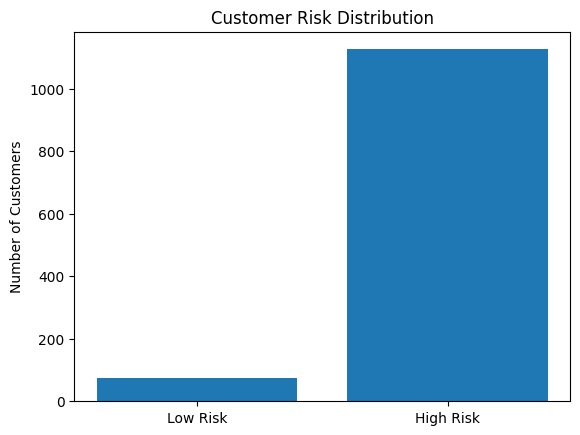

In [ ]:
risk_counts = df["default_risk"].value_counts()

plt.bar(risk_counts.index, risk_counts.values)
plt.xticks([0,1], ["Low Risk","High Risk"])
plt.ylabel("Number of Customers")
plt.title("Customer Risk Distribution")
plt.show()


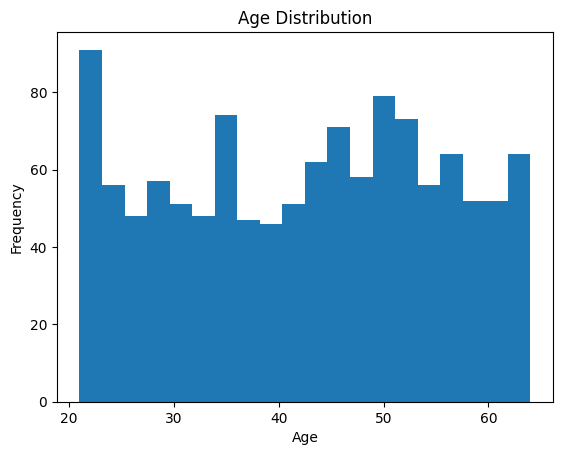

In [ ]:
plt.hist(df["age"], bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age Distribution")
plt.show()


/tmp/ipython-input-1917487449.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


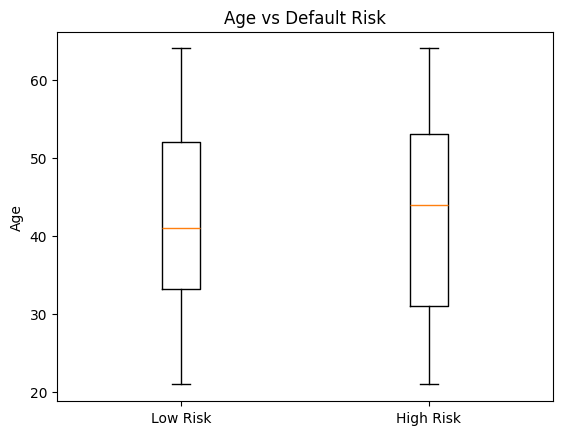

In [ ]:
plt.boxplot(
    [df[df["default_risk"]==0]["age"],
     df[df["default_risk"]==1]["age"]],
    labels=["Low Risk","High Risk"]
)
plt.title("Age vs Default Risk")
plt.ylabel("Age")
plt.show()


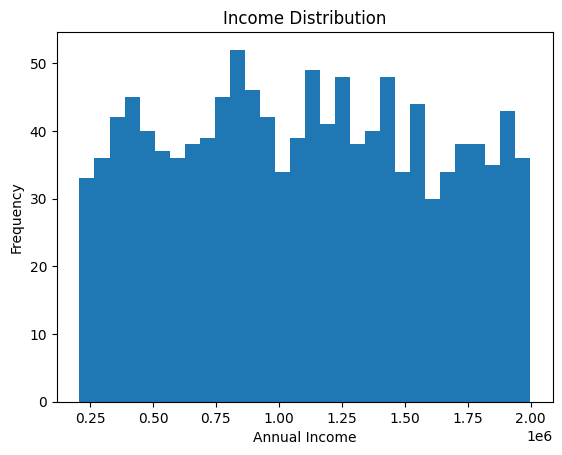

In [ ]:
plt.hist(df["annual_income"], bins=30)
plt.xlabel("Annual Income")
plt.ylabel("Frequency")
plt.title("Income Distribution")
plt.show()


/tmp/ipython-input-2084119997.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


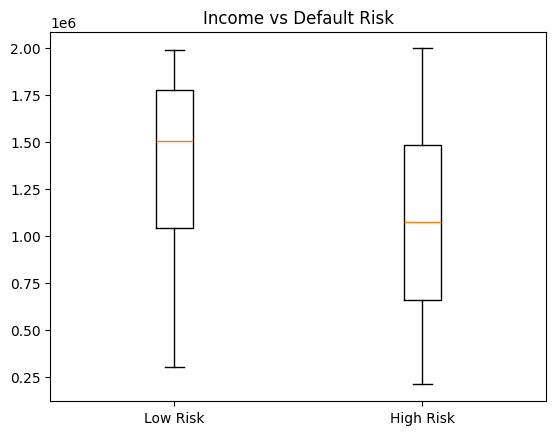

In [ ]:
plt.boxplot(
    [df[df["default_risk"]==0]["annual_income"],
     df[df["default_risk"]==1]["annual_income"]],
    labels=["Low Risk","High Risk"]
)
plt.title("Income vs Default Risk")
plt.show()


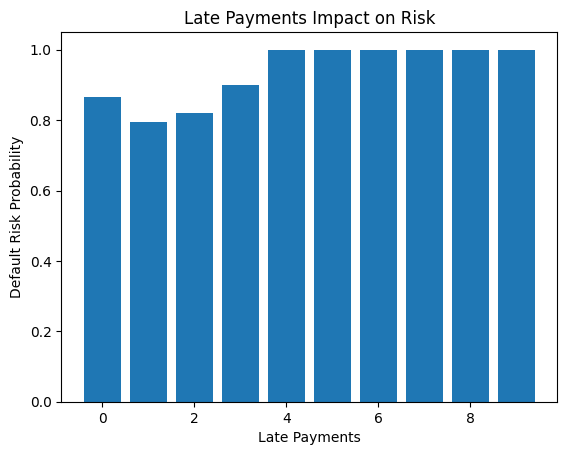

In [ ]:
late_vals = np.unique(df["late_payments"])
risk_prob = [df[df["late_payments"]==x]["default_risk"].mean() for x in late_vals]

plt.bar(late_vals, risk_prob)
plt.xlabel("Late Payments")
plt.ylabel("Default Risk Probability")
plt.title("Late Payments Impact on Risk")
plt.show()


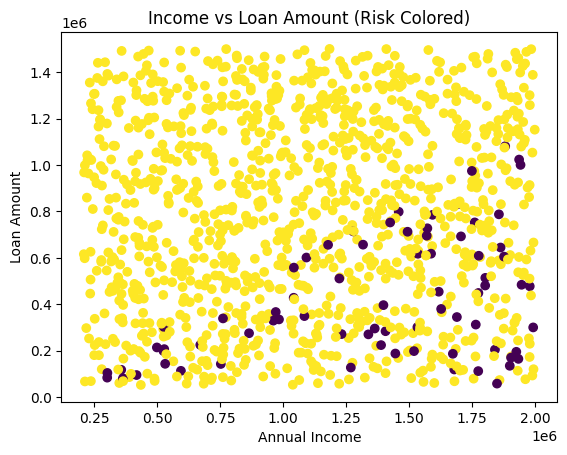

In [ ]:
plt.scatter(df["annual_income"], df["loan_amount"], c=df["default_risk"])
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.title("Income vs Loan Amount (Risk Colored)")
plt.show()


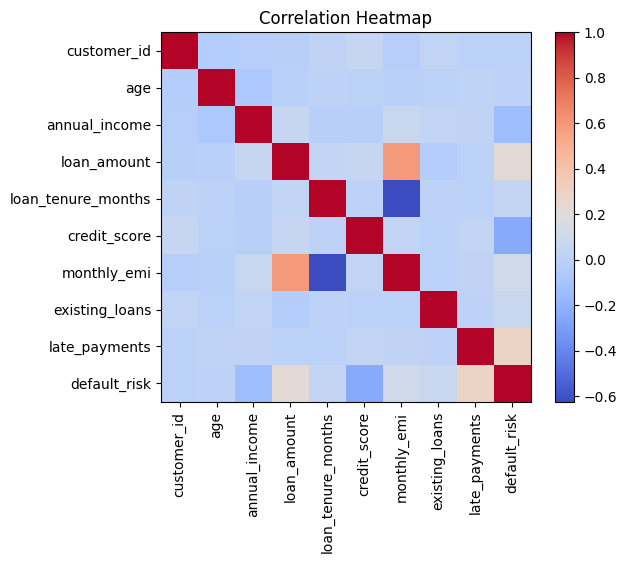

In [ ]:
corr = df.corr()

plt.imshow(corr, cmap="coolwarm")
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap")
plt.show()


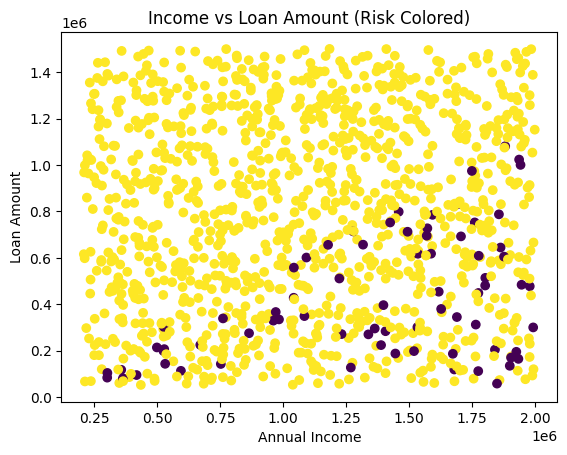

In [ ]:
plt.scatter(df["annual_income"], df["loan_amount"], c=df["default_risk"])
plt.xlabel("Annual Income")
plt.ylabel("Loan Amount")
plt.title("Income vs Loan Amount (Risk Colored)")
plt.show()


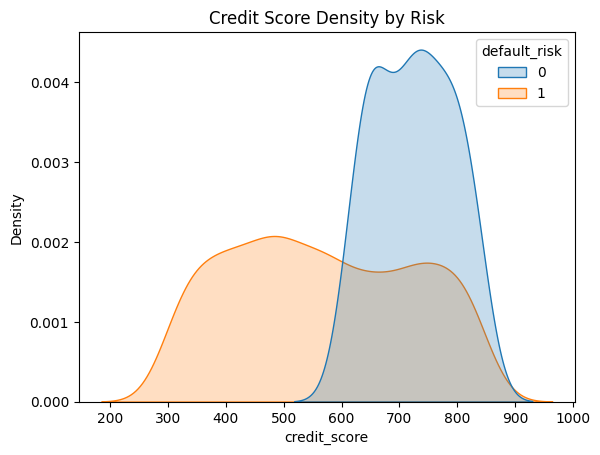

In [ ]:
import seaborn as sns
sns.kdeplot(
    data=df,
    x="credit_score",
    hue="default_risk",
    fill=True,
    common_norm=False
)
plt.title("Credit Score Density by Risk")
plt.show()


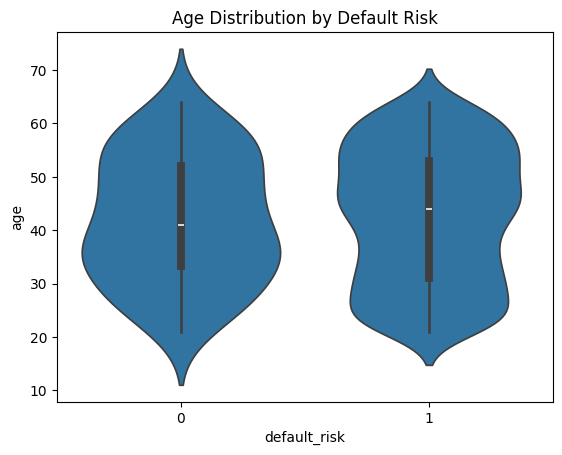

In [ ]:
sns.violinplot(x="default_risk", y="age", data=df)
plt.title("Age Distribution by Default Risk")
plt.show()
